In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
adata2 = sc.read_h5ad("scanpy/NGN2iN_TF_batch12_combined_dr_clustered.h5ad")

In [3]:
umap_df = pd.DataFrame(adata2.obsm['X_umap'],index=adata2.obs_names,columns=['umap_1','umap_2'])
meta = adata2.obs.copy()
meta = pd.merge(meta,umap_df,left_index=True,right_index=True)

In [3]:
meta2 = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)

In [6]:
meta2['final_label'].value_counts()

unknown          6900
label_TLX2        670
label_MSX1        385
label_EGFP        317
label_TCF7L1      225
label_TCF7L2      200
label_NEUROD1     167
label_NFATC1      165
label_LHX9        137
label_LEF1        111
label_PHOX2B       50
label_ZFHX3        28
label_LHX4         14
label_HOXB3         6
label_SMAD9         4
label_RXRG          4
label_MEIS2         1
Name: final_label, dtype: int64

In [7]:
meta2

,n_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,...,label_RXRG,label_RARB,label_NFIA,label_MEIS2,label_HOXB3,label_sum,final_label,run,pred_label,combined_label
AAACGAAGTTACGTAC-1,5890.0,2850,7.955425,5890.0,8.681181,15.789474,592.0,6.385194,10.050934,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown,batch1,unknown,unknown
AAACGAATCCACTTTA-1,554.0,270,5.602119,554.0,6.318968,27.256318,29.0,3.401197,5.234657,232.0,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown,batch1,unknown,unknown
AAACGCTCAATAGAGT-1,43372.0,7764,8.957382,43372.0,10.677592,10.260076,972.0,6.880384,2.241077,5687.0,...,0.0,0.0,0.0,0.0,0.0,1.0,label_EGFP,batch1,unknown,label_EGFP
AAAGGATTCACCTACC-1,2925.0,1220,7.107425,2925.0,7.981391,16.854701,8.0,2.197225,0.273504,997.0,...,0.0,0.0,0.0,0.0,0.0,1.0,label_EGFP,batch1,unknown,label_EGFP
AAAGGATTCTCTCTTC-1,720.0,513,6.242223,720.0,6.580639,15.833333,4.0,1.609438,0.555556,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown,batch1,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCATAACGGG-2,46837.0,8919,9.096051,46837.0,10.754450,7.876252,1102.0,7.005789,2.352841,3503.0,...,0.0,0.0,0.0,0.0,0.0,2.0,unknown,batch2,label_LHX9,label_LHX9
TTTGTTGGTCATCGCG-2,21623.0,6112,8.718173,21623.0,9.981559,11.964112,1196.0,7.087574,5.531148,1389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown,batch2,label_LEF1,label_LEF1
TTTGTTGGTCTACAAC-2,23331.0,6141,8.722906,23331.0,10.057581,15.957310,1353.0,7.210818,5.799151,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown,batch2,unknown,unknown
TTTGTTGGTCTGCATA-2,31058.0,6840,8.830689,31058.0,10.343644,10.551227,1747.0,7.466227,5.624960,4713.0,...,0.0,0.0,0.0,0.0,0.0,1.0,label_MSX1,batch2,label_MSX1,label_MSX1


In [8]:
9384-6900

2484

In [12]:
a = meta2['final_label'].value_counts()
b = a[a>20]
b = b[b<1000]

In [17]:
2138/9384*100

22.783461210571186

In [15]:
b.sum()-317

2138

In [14]:
b

label_TLX2       670
label_MSX1       385
label_EGFP       317
label_TCF7L1     225
label_TCF7L2     200
label_NEUROD1    167
label_NFATC1     165
label_LHX9       137
label_LEF1       111
label_PHOX2B      50
label_ZFHX3       28
Name: final_label, dtype: int64

In [6]:
meta2['final_label'].value_counts()

unknown          6900
label_TLX2        670
label_MSX1        385
label_EGFP        317
label_TCF7L1      225
label_TCF7L2      200
label_NEUROD1     167
label_NFATC1      165
label_LHX9        137
label_LEF1        111
label_PHOX2B       50
label_ZFHX3        28
label_LHX4         14
label_HOXB3         6
label_SMAD9         4
label_RXRG          4
label_MEIS2         1
Name: final_label, dtype: int64

In [5]:
meta = pd.merge(meta2,umap_df,left_index=True,right_index=True)

In [6]:
colors = pd.read_csv("/home/jjanssens/jjans/resources/colour_list.tsv",sep="\t",index_col=0)

In [7]:
import seaborn as sns

In [8]:
colors

,Colour
0,#ff0000
1,#ffc480
2,#149900
3,#307cbf
4,#d580ff
...,...
485,#4c3213
486,#688060
487,#001b33
488,#69238c


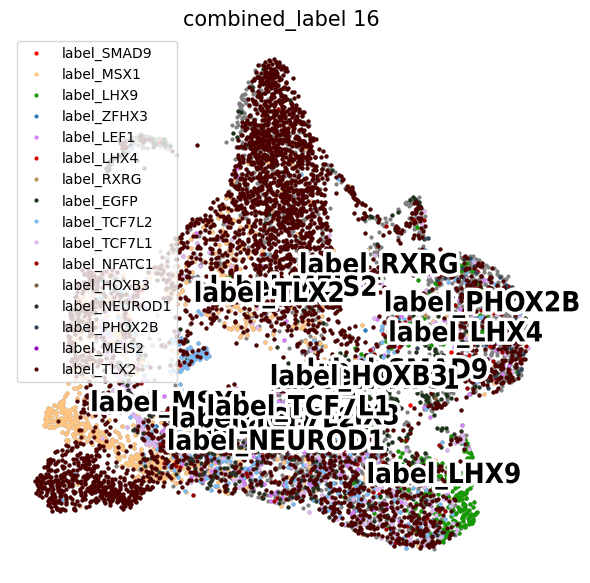

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['combined_label']:
    plt.figure(figsize=(7,7))
    i=0
    x,y= 'umap_1','umap_2'
    plt.plot(meta[x],meta[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in clusters:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster]['Colour'],markersize=2,label=cluster)
            x_text,y_text = plotting_meta[x].median(),plotting_meta[y].median()
            txt = plt.text(x_text-len(str(cluster))/3,y_text,str(cluster),ha='left',fontproperties=font0,wrap=True)
            txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster_col]['Colour'],markersize=2,label=cluster)
            cluster_col+=1
            x_text,y_text = plotting_meta[x].median(),plotting_meta[y].median()
            txt = plt.text(x_text-len(str(cluster))/3,y_text,str(cluster),ha='left',fontproperties=font0,wrap=True)
            txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
    plt.legend()
#    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


In [10]:
OE_TFs = ['TLX2','MSX1','TCF7L1','TCF7L2','NEUROD1','LHX9','LEF1','NFATC1','PHOX2B','ZFHX3','LHX4']
label_TFs = ['label_'+x for x in OE_TFs]

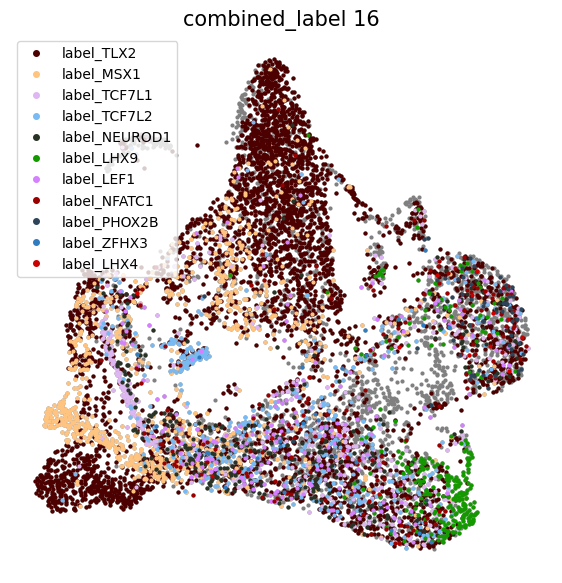

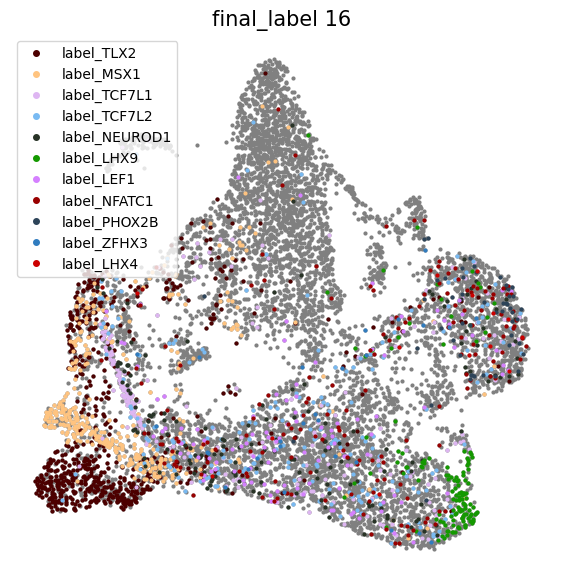

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['combined_label','final_label']:
    plt.figure(figsize=(7,7))
    i=0
    x,y= 'umap_1','umap_2'
    plt.plot(meta[x],meta[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in label_TFs:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster]['Colour'],markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster_col]['Colour'],markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
    plt.legend(markerscale=2)
    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP_XGB_legend.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


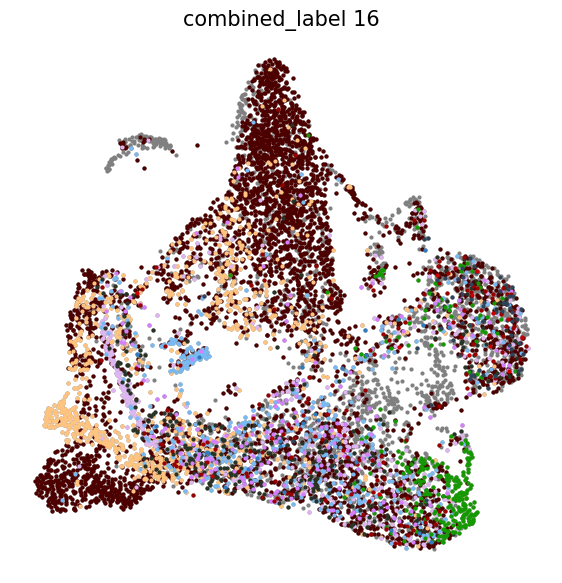

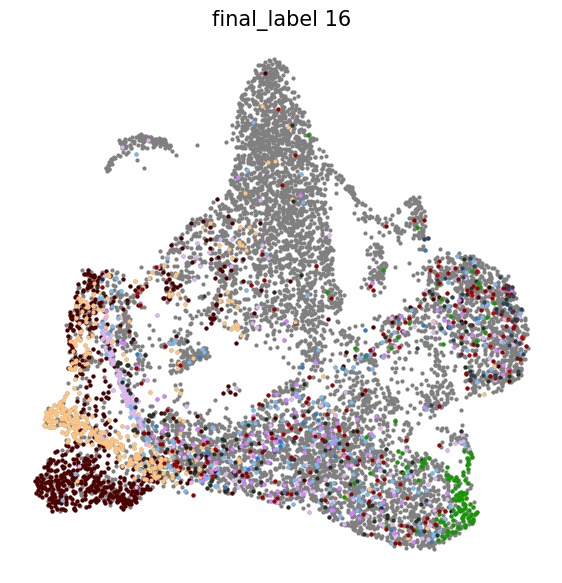

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['combined_label','final_label']:
    plt.figure(figsize=(7,7))
    i=0
    x,y= 'umap_1','umap_2'
    plt.plot(meta[x],meta[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in label_TFs:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster]['Colour'],markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster_col]['Colour'],markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
#    plt.legend(markerscale=2)
    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP_XGB.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


In [25]:
C1 = pd.read_csv("seurat_withscreen/projected_umap_oe_cells.tsv",sep="\t",index_col=0)
C1.columns = ['proj_umap_1','proj_umap_2']

In [30]:
meta_proj = pd.merge(meta,C1,left_index=True,right_index=True)

In [32]:
B1 = pd.read_csv("seurat_withscreen/projected_umap_oe_cells_background.tsv",sep="\t",index_col=0)
B1.columns = ['proj_umap_1','proj_umap_2']

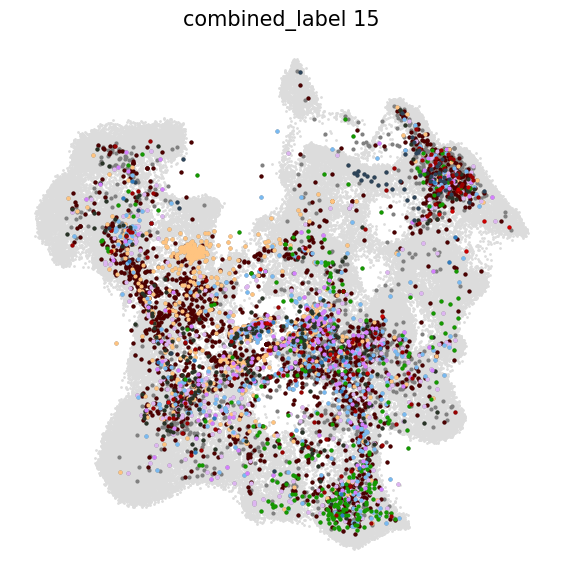

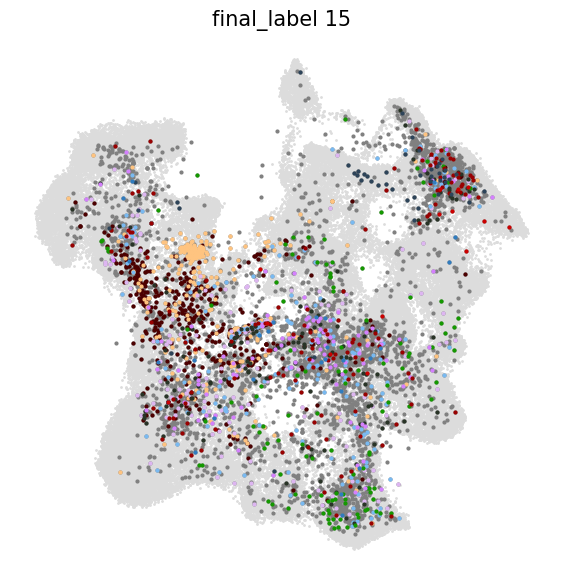

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['combined_label','final_label']:
    plt.figure(figsize=(7,7))
    i=0

    x,y= 'proj_umap_1','proj_umap_2'
    plt.scatter(x=B1[x],y=B1[y],s=1,c='gainsboro')
    plt.plot(meta_proj[x],meta_proj[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta_proj
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in label_TFs:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster]['Colour'],markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster_col]['Colour'],markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
#    plt.legend(markerscale=2)
    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP_XGB_projected.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


In [38]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

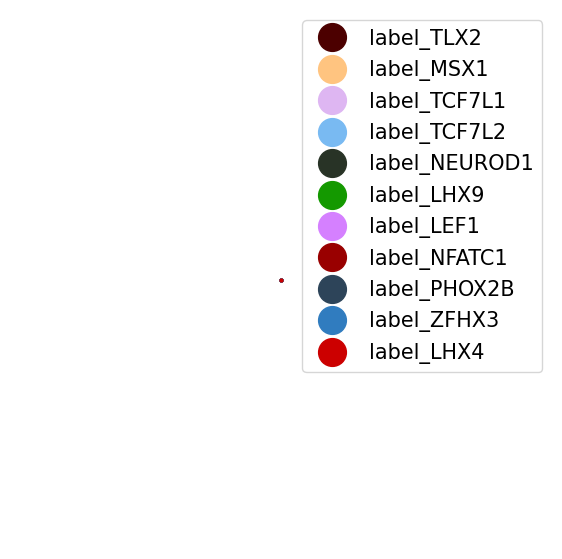

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['final_label']:
    plt.figure(figsize=(7,7))
    i=0

    x,y= 'proj_umap_1','proj_umap_2'
    #plt.scatter(x=B1[x],y=B1[y],s=1,c='gainsboro')
    #plt.plot(meta_proj[x],meta_proj[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta_proj
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in label_TFs:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(1,1,'o',c=colors.loc[cluster,'Colour'],markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(1,1,'o',markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
    plt.title('')
    plt.legend(markerscale=10,fontsize=15)
    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP_XGB_projected_legendonly.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


In [50]:
label_colors = colors.loc[[x for x in colors.index if 'label' in str(x)]]

In [51]:
label_colors.to_csv("label_colors.tsv",sep="\t")

In [46]:
colors

,Colour
0,#ff0000
1,#ffc480
2,#149900
3,#307cbf
4,#d580ff
...,...
label_HOXB3,#7f6240
label_NEUROD1,#283326
label_PHOX2B,#2d4459
label_MEIS2,#8f00b3


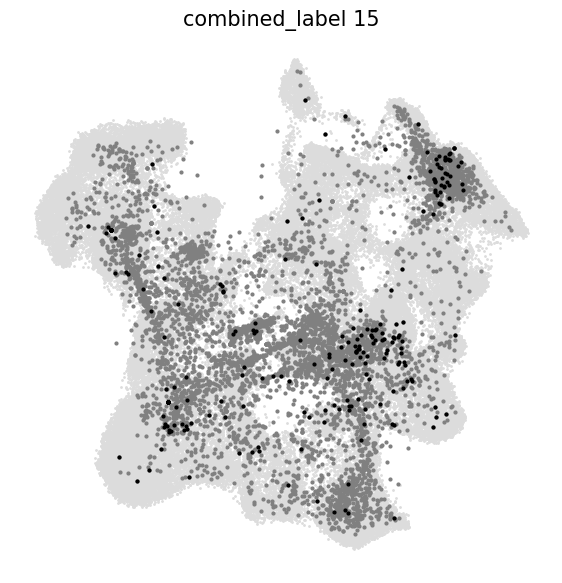

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['combined_label']:
    plt.figure(figsize=(7,7))
    i=0
    x,y= 'proj_umap_1','proj_umap_2'
    plt.scatter(x=B1[x],y=B1[y],s=1,c='gainsboro')
    plt.plot(meta_proj[x],meta_proj[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta_proj
    
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in ['label_EGFP']:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c='k',markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster_col]['Colour'],markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
#    plt.legend(markerscale=2)
    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP_XGB_ctrl_projected.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


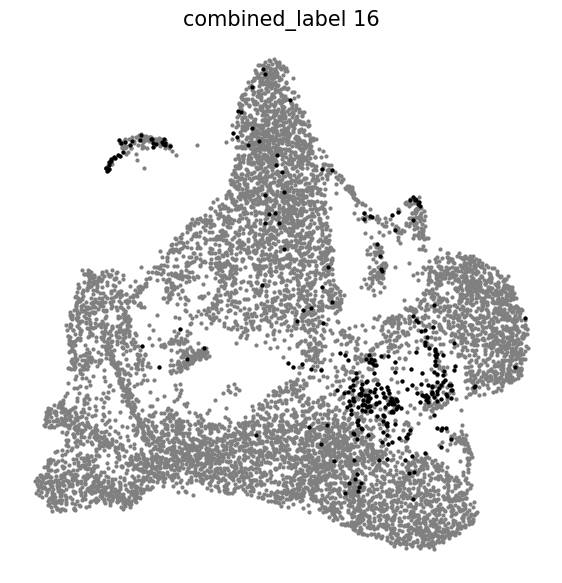

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects
texts = []

font0 = FontProperties()
font0.set_family('sans-serif')
font0.set_size('20')
font0.set_weight('bold')
font0.set_stretch("extra-condensed")

for resolution in ['combined_label']:
    plt.figure(figsize=(7,7))
    i=0
    x,y= 'umap_1','umap_2'
    plt.plot(meta[x],meta[y],'o',c='gray',markersize=2)
    meta_AP_ctrl = meta
    clusters = set(meta_AP_ctrl[resolution])
    cluster_col = 0

    clusters = [x for x in clusters if x!='unknown']
    for cluster in ['label_EGFP']:
        plotting_meta = meta_AP_ctrl.loc[meta_AP_ctrl[resolution]==cluster,]
        if cluster in colors.index:
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c='k',markersize=2,label=cluster)
        else:
            colors.loc[cluster,'Colour'] = colors.loc[cluster_col]['Colour']
            plt.plot(plotting_meta[x],plotting_meta[y],'o',c=colors.loc[cluster_col]['Colour'],markersize=2,label=cluster)
            cluster_col+=1
        
        i+=1

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(resolution+' '+str(len(clusters)),fontsize=15)
    sns.despine(top=True,bottom=True,right=True,left=True)
    plt.xticks([])
    plt.yticks([])
#    plt.legend(markerscale=2)
    plt.savefig("figures/scanpy_clustering_"+resolution+"_UMAP_XGB_ctrl.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


In [15]:
a = meta2['final_label'].value_counts()
b = meta2['combined_label'].value_counts()

In [16]:
a

unknown          6900
label_TLX2        670
label_MSX1        385
label_EGFP        317
label_TCF7L1      225
label_TCF7L2      200
label_NEUROD1     167
label_NFATC1      165
label_LHX9        137
label_LEF1        111
label_PHOX2B       50
label_ZFHX3        28
label_LHX4         14
label_HOXB3         6
label_SMAD9         4
label_RXRG          4
label_MEIS2         1
Name: final_label, dtype: int64

In [17]:
a

unknown          6900
label_TLX2        670
label_MSX1        385
label_EGFP        317
label_TCF7L1      225
label_TCF7L2      200
label_NEUROD1     167
label_NFATC1      165
label_LHX9        137
label_LEF1        111
label_PHOX2B       50
label_ZFHX3        28
label_LHX4         14
label_HOXB3         6
label_SMAD9         4
label_RXRG          4
label_MEIS2         1
Name: final_label, dtype: int64

In [18]:
c = pd.DataFrame([a,b])

In [19]:
c

,unknown,label_TLX2,label_MSX1,label_EGFP,label_TCF7L1,label_TCF7L2,label_NEUROD1,label_NFATC1,label_LHX9,label_LEF1,label_PHOX2B,label_ZFHX3,label_LHX4,label_HOXB3,label_SMAD9,label_RXRG,label_MEIS2
final_label,6900,670,385,317,225,200,167,165,137,111,50,28,14,6,4,4,1
combined_label,1888,4253,914,317,419,463,348,166,296,201,62,28,14,6,4,4,1


In [21]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/tmp/ipykernel_66296/3054365366.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,10000])


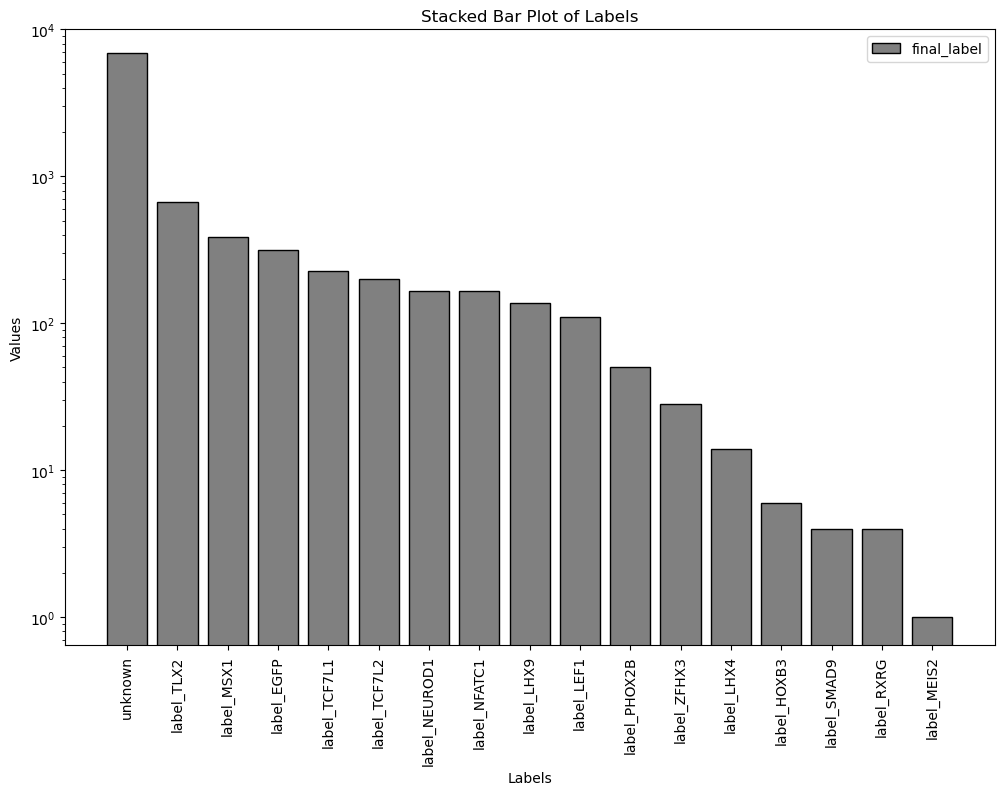

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = c.columns
final_label = c.loc['final_label']
combined_label = c.loc['combined_label']

# Position of labels on x-axis
x = np.arange(len(labels))

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(x, final_label, label='final_label',color='grey',edgecolor='k')
#bar2 = ax.bar(x, combined_label, label='combined_label',color='w',alpha=0.5,edgecolor='k')

ax.set_yscale("log")
# Adding labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Plot of Labels')
ax.set_ylim([0,10000])
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Display the plot
plt.savefig("figures/barplot_assignments_final.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("figures/barplot_assignments_final.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

plt.show()
plt.close()

/tmp/ipykernel_66296/1873032065.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,10000])


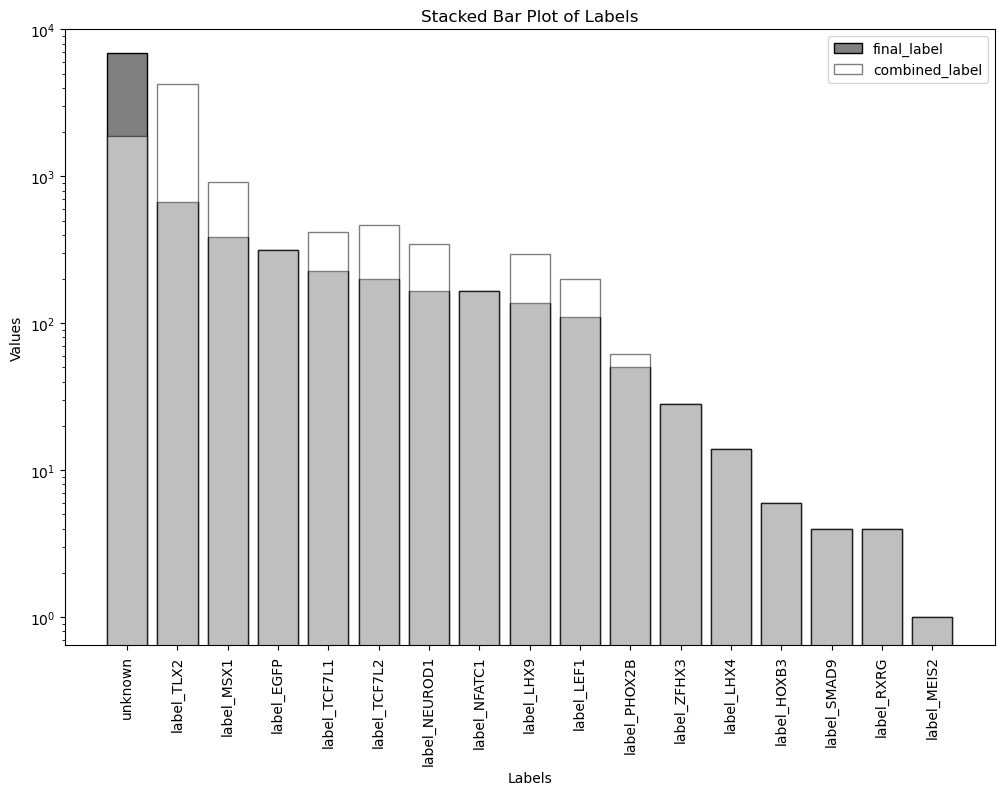

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = c.columns
final_label = c.loc['final_label']
combined_label = c.loc['combined_label']

# Position of labels on x-axis
x = np.arange(len(labels))

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(x, final_label, label='final_label',color='grey',edgecolor='k')
bar2 = ax.bar(x, combined_label, label='combined_label',color='w',alpha=0.5,edgecolor='k')

ax.set_yscale("log")
# Adding labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Plot of Labels')
ax.set_ylim([0,10000])
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Display the plot
plt.savefig("figures/barplot_assignments.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("figures/barplot_assignments.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

plt.show()
plt.close()

<AxesSubplot: xlabel='final_label', ylabel='final_label'>

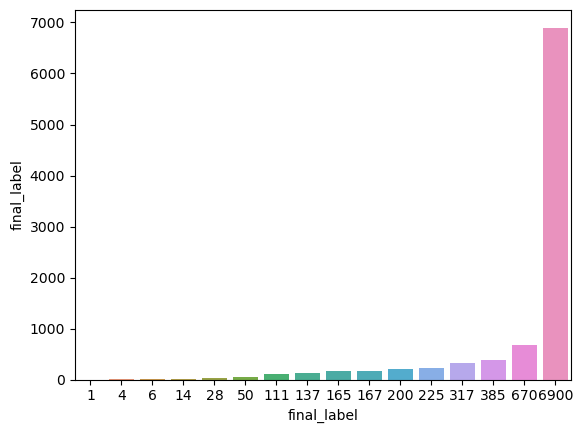

In [47]:
sns.barplot(data=a,x=a.index,y=a)

<AxesSubplot: xlabel='combined_label', ylabel='combined_label'>

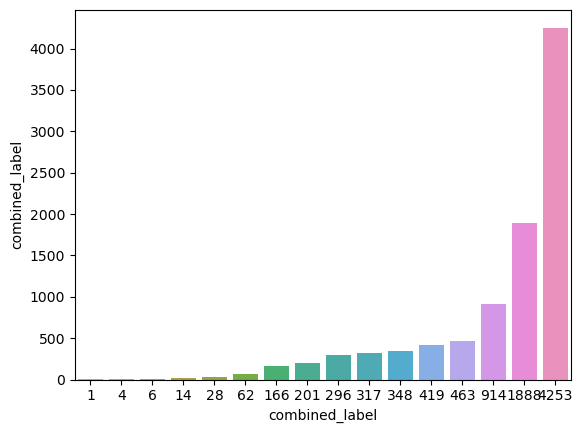

In [48]:
sns.barplot(data=b,x=b.index,y=b)